#Q1.
Mathematical formula for a linear SVM:
    
The mathematical formula for a linear SVM can be represented as follows:
   
   f(x)=sign(∑ ni=1 wixi+b)
   
where 

w is the weight vector, 

x is the input vector, 

b is the bias term, and 

n is the number of features.   

In [1]:
#1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


#Q2
Q2. Objective function of a linear SVM:
The objective function of a linear SVM aims to maximize the margin between different classes while minimizing the classification error. It is formulated as a constrained optimization problem:

minimize(1/2.∥w∥^2)

subject to the constraints:

yi(w⋅xi+b)≥1

where 

w is the weight vector, 

b is the bias term, 


xi is the input vector, and 

yi is the class label.

#Q3
 Kernel trick in SVM:

The kernel trick allows SVMs to handle non-linear decision boundaries by implicitly mapping the input features into a higher-dimensional space. The transformed data can then be used to find a linear separation. Common kernels include polynomial and radial basis function (RBF).

In [2]:
#3
# Using RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')
svm_classifier_rbf.fit(X_train, y_train)
y_pred_rbf = svm_classifier_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF kernel: {accuracy_rbf}")


Accuracy with RBF kernel: 1.0


#Q4
Role of support vectors in SVM:

Support vectors are the data points that lie closest to the decision boundary. They play a crucial role in defining the decision boundary and are used to determine the optimal hyperplane. Support vectors are the ones that have non-zero coefficients in the dual formulation of the SVM problem.

In [4]:
#4
# Accessing support vectors
support_vectors = svm_classifier.support_vectors_
print("Support Vectors:\n", support_vectors)

Support Vectors:
 [[4.8 3.4 1.9 0.2]
 [5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]
 [5.6 3.  4.5 1.5]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.  2.7 5.1 1.6]
 [6.3 2.5 4.9 1.5]
 [6.1 2.9 4.7 1.4]
 [6.5 2.8 4.6 1.5]
 [6.9 3.1 4.9 1.5]
 [6.3 2.3 4.4 1.3]
 [6.3 2.5 5.  1.9]
 [6.3 2.8 5.1 1.5]
 [6.3 2.7 4.9 1.8]
 [6.  3.  4.8 1.8]
 [6.  2.2 5.  1.5]
 [6.2 2.8 4.8 1.8]
 [6.5 3.  5.2 2. ]
 [7.2 3.  5.8 1.6]
 [5.6 2.8 4.9 2. ]
 [5.9 3.  5.1 1.8]
 [4.9 2.5 4.5 1.7]]


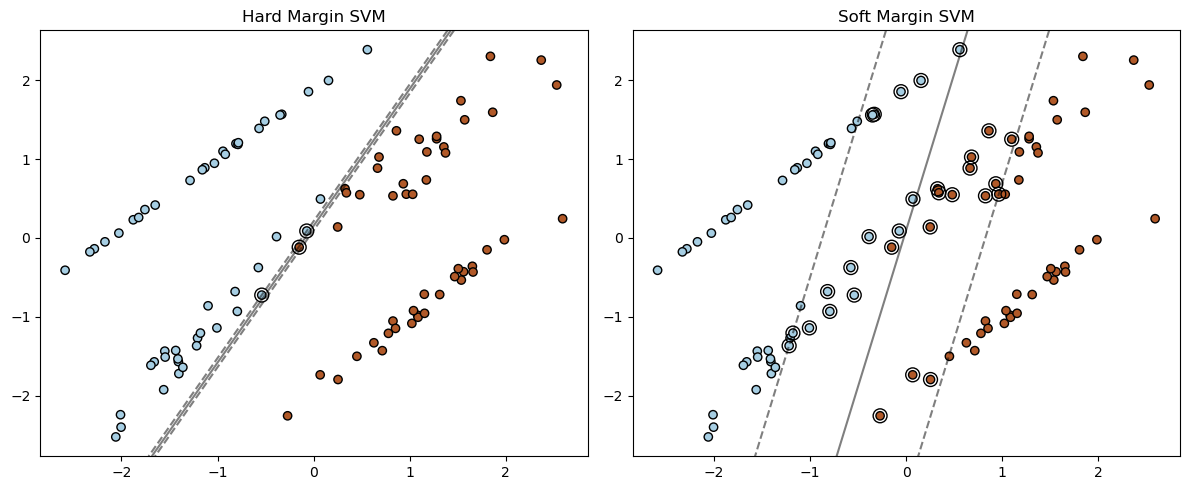

In [10]:
#5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit SVM models with different margins
svm_hard_margin = SVC(kernel='linear', C=1e3)  # Hard margin SVM
svm_soft_margin = SVC(kernel='linear', C=0.1)   # Soft margin SVM

svm_hard_margin.fit(X, y)
svm_soft_margin.fit(X, y)

# Plotting decision boundaries
plt.figure(figsize=(12, 5))

# Plotting Hard Margin SVM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.scatter(svm_hard_margin.support_vectors_[:, 0], svm_hard_margin.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

# Plot decision boundary for hard margin SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_hard_margin.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Hard Margin SVM')

# Plotting Soft Margin SVM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.scatter(svm_soft_margin.support_vectors_[:, 0], svm_soft_margin.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

# Plot decision boundary for soft margin SVM
Z_soft = svm_soft_margin.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)
plt.contour(xx, yy, Z_soft, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Soft Margin SVM')

plt.tight_layout()
plt.show()

In [51]:
#Q6(1)

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can choose other kernels as well, like 'rbf' or 'poly'

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [52]:
#Q6(2)
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Print the predicted labels for the testing set
print("Predicted labels for the testing set:")
print(y_pred)


Predicted labels for the testing set:
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [54]:
#Q6(3)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


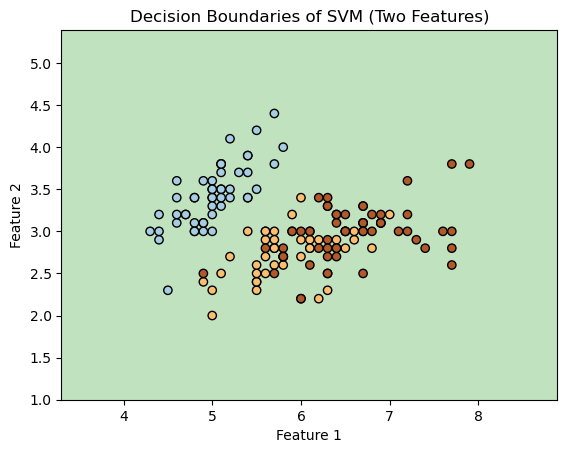

In [59]:
#Q6(4)

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Select two features for visualization (e.g., the first two features)
X_visualization = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Plot decision boundaries
x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
y_min, y_max = X_visualization[:, 1].min() - 1, X_visualization[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Decision Boundaries of SVM (Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


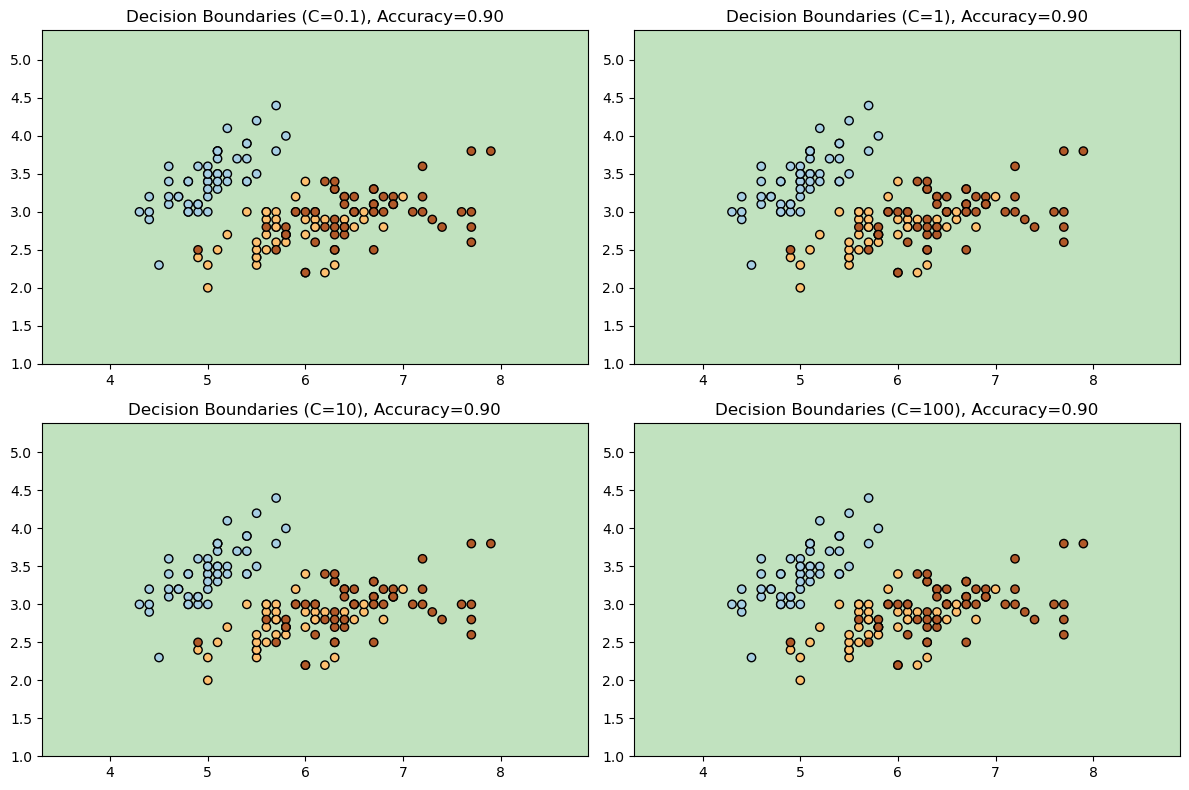

In [60]:
#Q6(5)

# Select two features for visualization (e.g., the first two features)
X_visualization = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualization, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Different values of C to try
C_values = [0.1, 1, 10, 100]

# Plot decision boundaries for each value of C
plt.figure(figsize=(12, 8))

for i, C in enumerate(C_values, 1):
    # Create an SVM classifier with a linear kernel and specific C value
    svm_classifier = SVC(kernel='linear', C=C)
    
    # Train the classifier on the training set
    svm_classifier.fit(X_train, y_train)
    
    # Predict labels for the testing set
    y_pred = svm_classifier.predict(X_test)
    
    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Plot decision boundaries
    plt.subplot(2, 2, i)
    plt.title(f'Decision Boundaries (C={C}), Accuracy={accuracy:.2f}')
    
    x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
    y_min, y_max = X_visualization[:, 1].min() - 1, X_visualization[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.tight_layout()
plt.show()
